# Capstone Regression Project

## Business Understanding

## Data Understanding

-describes source of dataset
-what each record represents
-which column is begin used as the regress

## Data Preparation

### Loading the Data

In [329]:
#importing all appropriate Pythonic libraries and packages 

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
from sklearn.metrics import mean_absolute_error
from random import gauss
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats as stats
import re
%matplotlib inline

In [330]:
# reading in the King County dataset to Pandas
df = pd.read_csv('data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


### Data Exploration

In [331]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

In [332]:
# dropping the placeholder column
df.drop(labels='id', axis=1, inplace=True)

In [333]:
# converting all dates to datetime
df['date'] = pd.to_datetime(df['date'])

In [334]:
# isolating the zip code 
# alternative methods to achieve same
# df['Zipcode'] = df['address'].str.extract(r'(\d{5}\-?\d{0,4})')
# df['address'][0].split(',')[2][-5:]
# df['address'][1000][-20:-15]

In [335]:
df['Zipcode'] = df['address'].apply(lambda x: x[-20:-15])

In [336]:
df['Zipcode'] = df['Zipcode'].astype(int)

<AxesSubplot:>

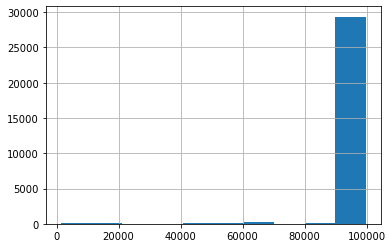

In [337]:
df['Zipcode'].hist()

In [338]:
# controling for outliers
df = df.loc[(df['Zipcode'] > 98000) & (df['Zipcode'] <= 98288)]

In [339]:
# reading in Zip/Neighborhood/Population dataset
df_zip = pd.read_csv('data/kc_zipcode_details.csv', index_col=0)
df_zip.head()

,Neighborhood,Population
ZIP Code,,
98001,Auburn,31911.0
98002,Auburn,31647.0
98003,Federal Way,44151.0
98004,Bellevue,27946.0
98005,Bellevue,17714.0


In [340]:
df_zip.Neighborhood.nunique()

38

In [341]:
# changing index name to match other dataset
df_zip.index.names = ['Zipcode']

In [342]:
df_zip.reset_index(inplace=True)
df_zip.head()

,Zipcode,Neighborhood,Population
0,98001,Auburn,31911.0
1,98002,Auburn,31647.0
2,98003,Federal Way,44151.0
3,98004,Bellevue,27946.0
4,98005,Bellevue,17714.0


<AxesSubplot:>

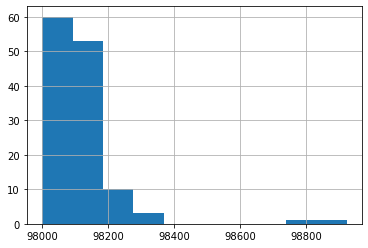

In [343]:
df_zip['Zipcode'].hist()

In [344]:
# controlling for outliers
df_zip = df_zip.loc[(df_zip['Zipcode'] > 98000) & (df_zip['Zipcode'] <= 98288)]

In [345]:
df_zip.nunique()

Zipcode         124
Neighborhood     34
Population       81
dtype: int64

In [346]:
df['Zipcode'].nunique()

81

### Renaming Selldate

In [347]:
# renaming date to selldate
rnmdate = {'date':'selldate'}
df.rename(columns=rnmdate, inplace=True)

## Engineering Yr_Old

In [348]:
# creating a year old column
df['yr_old'] = np.where(df['yr_renovated'] !=0,df.selldate.apply(lambda x: x.year) - df['yr_renovated'],
                        df['selldate'].apply(lambda x: x.year) - df['yr_built'])

In [349]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long,Zipcode,yr_old
count,2.920800e+04,29208.000000,29208.000000,29208.000000,2.920800e+04,29208.000000,29208.000000,29208.000000,29208.000000,29208.000000,29208.000000,29208.000000,29208.000000,29208.000000,29208.000000,29208.000000
mean,1.113195e+06,3.435497,2.332221,2131.250342,1.720087e+04,1.516947,1826.203437,480.945974,336.247364,216.391742,1973.852267,93.870241,47.543569,-122.214082,98077.348740,44.764688
std,8.956666e+05,0.978918,0.896185,977.621843,6.129149e+04,0.548426,881.013444,586.026595,286.269126,246.817642,31.688131,422.843882,0.146367,0.143646,54.326649,31.012330
min,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,47.155265,-122.526650,98001.000000,-1.000000
25%,6.450000e+05,3.000000,2.000000,1440.000000,5.000000e+03,1.000000,1190.000000,0.000000,0.000000,40.000000,1952.000000,0.000000,47.431060,-122.328355,98032.000000,18.000000
50%,8.689000e+05,3.000000,2.500000,1940.000000,7.560000e+03,1.500000,1580.000000,0.000000,400.000000,141.500000,1976.000000,0.000000,47.557997,-122.233798,98059.000000,43.000000
75%,1.310000e+06,4.000000,3.000000,2640.000000,1.078075e+04,2.000000,2290.000000,960.000000,510.250000,310.000000,2001.000000,0.000000,47.672063,-122.127324,98117.000000,66.000000
max,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,48.111504,-121.163960,98288.000000,122.000000


In [350]:
# controlling for dates where house was sold after renovation
df.loc[df['yr_old'] < 0, 'yr_old'] = 0

In [351]:
df.yr_old.value_counts()

0      1365
1       659
44      504
54      478
16      468
       ... 
122      32
87       31
88       30
119      30
120      27
Name: yr_old, Length: 123, dtype: int64

### Data Cleaning

In [352]:
df.isna().sum()/df.shape[0]

selldate         0.000000
price            0.000000
bedrooms         0.000000
bathrooms        0.000000
sqft_living      0.000000
sqft_lot         0.000000
floors           0.000000
waterfront       0.000000
greenbelt        0.000000
nuisance         0.000000
view             0.000000
condition        0.000000
grade            0.000000
heat_source      0.000993
sewer_system     0.000445
sqft_above       0.000000
sqft_basement    0.000000
sqft_garage      0.000000
sqft_patio       0.000000
yr_built         0.000000
yr_renovated     0.000000
address          0.000000
lat              0.000000
long             0.000000
Zipcode          0.000000
yr_old           0.000000
dtype: float64

In [353]:
# remove missing values in columns
df.dropna(subset=['heat_source', 'sewer_system'], axis=0, inplace=True)

In [354]:
df_zip.isna().sum()/df.shape[0]

Zipcode         0.00000
Neighborhood    0.00000
Population      0.00144
dtype: float64

In [355]:
df_zip.dropna(subset=['Population'], axis=0, inplace=True)

## Merge on zipcode to include neighborhood/population

In [356]:
df1 = df.merge(df_zip, how='left', on='Zipcode')

In [357]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29168 entries, 0 to 29167
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   selldate       29168 non-null  datetime64[ns]
 1   price          29168 non-null  float64       
 2   bedrooms       29168 non-null  int64         
 3   bathrooms      29168 non-null  float64       
 4   sqft_living    29168 non-null  int64         
 5   sqft_lot       29168 non-null  int64         
 6   floors         29168 non-null  float64       
 7   waterfront     29168 non-null  object        
 8   greenbelt      29168 non-null  object        
 9   nuisance       29168 non-null  object        
 10  view           29168 non-null  object        
 11  condition      29168 non-null  object        
 12  grade          29168 non-null  object        
 13  heat_source    29168 non-null  object        
 14  sewer_system   29168 non-null  object        
 15  sqft_above     2916

In [358]:
df1.isna().sum()/df.shape[0]

selldate         0.000000
price            0.000000
bedrooms         0.000000
bathrooms        0.000000
sqft_living      0.000000
sqft_lot         0.000000
floors           0.000000
waterfront       0.000000
greenbelt        0.000000
nuisance         0.000000
view             0.000000
condition        0.000000
grade            0.000000
heat_source      0.000000
sewer_system     0.000000
sqft_above       0.000000
sqft_basement    0.000000
sqft_garage      0.000000
sqft_patio       0.000000
yr_built         0.000000
yr_renovated     0.000000
address          0.000000
lat              0.000000
long             0.000000
Zipcode          0.000000
yr_old           0.000000
Neighborhood     0.000549
Population       0.000549
dtype: float64

In [359]:
df1.dropna(subset=['Population', 'Neighborhood'], axis=0, inplace=True)

In [360]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29152 entries, 0 to 29167
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   selldate       29152 non-null  datetime64[ns]
 1   price          29152 non-null  float64       
 2   bedrooms       29152 non-null  int64         
 3   bathrooms      29152 non-null  float64       
 4   sqft_living    29152 non-null  int64         
 5   sqft_lot       29152 non-null  int64         
 6   floors         29152 non-null  float64       
 7   waterfront     29152 non-null  object        
 8   greenbelt      29152 non-null  object        
 9   nuisance       29152 non-null  object        
 10  view           29152 non-null  object        
 11  condition      29152 non-null  object        
 12  grade          29152 non-null  object        
 13  heat_source    29152 non-null  object        
 14  sewer_system   29152 non-null  object        
 15  sqft_above     2915

In [361]:
df1.isna().sum()/df1.shape[0]

selldate         0.0
price            0.0
bedrooms         0.0
bathrooms        0.0
sqft_living      0.0
sqft_lot         0.0
floors           0.0
waterfront       0.0
greenbelt        0.0
nuisance         0.0
view             0.0
condition        0.0
grade            0.0
heat_source      0.0
sewer_system     0.0
sqft_above       0.0
sqft_basement    0.0
sqft_garage      0.0
sqft_patio       0.0
yr_built         0.0
yr_renovated     0.0
address          0.0
lat              0.0
long             0.0
Zipcode          0.0
yr_old           0.0
Neighborhood     0.0
Population       0.0
dtype: float64

In [362]:
# df1['condition'].value_counts()

## Grade

In [363]:
df1.grade.value_counts()

7 Average        11533
8 Good            8847
9 Better          3589
6 Low Average     2847
10 Very Good      1347
11 Excellent       402
5 Fair             385
12 Luxury          122
4 Low               46
13 Mansion          24
3 Poor               9
2 Substandard        1
Name: grade, dtype: int64

In [364]:
df1.grade.value_counts()

7 Average        11533
8 Good            8847
9 Better          3589
6 Low Average     2847
10 Very Good      1347
11 Excellent       402
5 Fair             385
12 Luxury          122
4 Low               46
13 Mansion          24
3 Poor               9
2 Substandard        1
Name: grade, dtype: int64

In [365]:
grade_map = {
    "7 Average": 7,
    "8 Good": 8,
    "9 Better": 9,
    "6 Low Average": 6,
    "5 Fair": 5,
    "4 Low": 4,
    "3 Poor": 3,
    "2 Substandard": 2,
    "10 Very Good": 10,
    "11 Excellent": 11,
    "13 Mansion": 13,
    "12 Luxury": 12,
}

In [366]:
df1.grade = df1.grade.map(grade_map)

In [367]:
# making results more model friendly 
# dum_df1.loc[dum_df1['grade'] == '2 Substandard', 'grade'] = 1
# dum_df1.loc[dum_df1['grade'] == '3 Poor', 'grade'] = 1
# dum_df1.loc[dum_df1['grade'] == '4 Low', 'grade'] = 1

# dum_df1.loc[dum_df1['grade'] == '5 Fair', 'grade'] = 2
# dum_df1.loc[dum_df1['grade'] == '6 Low Average', 'grade'] = 2
# dum_df1.loc[dum_df1['grade'] == '7 Average', 'grade'] = 2

# dum_df1.loc[dum_df1['grade'] == '8 Good', 'grade'] = 3
# dum_df1.loc[dum_df1['grade'] == '9 Better', 'grade'] = 3
# dum_df1.loc[dum_df1['grade'] == '10 Very Good', 'grade'] = 3

# dum_df1.loc[dum_df1['grade'] == '11 Excellent', 'grade'] = 4
# dum_df1.loc[dum_df1['grade'] == '12 Luxury', 'grade'] = 4
# dum_df1.loc[dum_df1['grade'] == '13 Mansion', 'grade'] = 4

## Condition

In [368]:
# df1.loc[(df1['nuisance'] == 'YES') & (df1['greenbelt'] == 'YES'), 'protected'] = 'protected'
# df1.loc[(df1['nuisance'] != 'YES') | (df1['greenbelt'] != 'YES'), 'protected'] = 'unprotected'

In [369]:
# df1['protected']

In [370]:
# df1['grade'].value_counts()

HomeSales 
standard scaling allows you to find coefficients. 
Be sure to include metric - r squared - to describe overall model performance.  
collineriety 
log scalling
remove outliers.  
Increase r squared. 


1. run model
2. see improvements, clean/feature engineer.  
3. see coefficients becoming more accurate.


## Target distribution

In [371]:
df1.corr()['price']

price            1.000000
bedrooms         0.290832
bathrooms        0.488047
sqft_living      0.616651
sqft_lot         0.086778
floors           0.199824
grade            0.577972
sqft_above       0.546001
sqft_basement    0.246354
sqft_garage      0.267526
sqft_patio       0.317651
yr_built         0.106133
yr_renovated     0.085455
lat              0.297267
long             0.081310
Zipcode         -0.104735
yr_old          -0.138201
Population      -0.112760
Name: price, dtype: float64

## Modeling 1:08

In [373]:
# Creating categorical variables
cats = df1[['waterfront','greenbelt', 'nuisance', 'view', 'condition', 'heat_source', 'sewer_system', 'Neighborhood']]
cats1 = df1[['selldate','price','waterfront','greenbelt', 'nuisance', 'view', 'condition', 'heat_source', 'sewer_system', 'address', 'Zipcode', 'Neighborhood']]

### Baseline Model

In [374]:
pred_cols = [x for x in df1.columns if x not in cats1]

In [375]:
pred_cols

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'grade',
 'sqft_above',
 'sqft_basement',
 'sqft_garage',
 'sqft_patio',
 'yr_built',
 'yr_renovated',
 'lat',
 'long',
 'yr_old',
 'Population']

In [376]:
# create baseline model
preds = df1[pred_cols]
target = df1['price']

In [377]:
y = target
X = preds
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()

In [378]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.511
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     1905.
Date:                Wed, 21 Sep 2022   Prob (F-statistic):               0.00
Time:                        13:25:54   Log-Likelihood:            -4.3047e+05
No. Observations:               29152   AIC:                         8.610e+05
Df Residuals:                   29135   BIC:                         8.611e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -7.411e+07   4.28e+06    -17.318      0.000   -8.25e+07   -6.57e+07
bedrooms      -1.091e+05   5123.311    -21.291      0.000   -1.19e+05    -9.9e+04
bathrooms      1.031e+05   7509.003     13.731      0.000    8.84e+04    1.18e+05
sqft_living     229.3971     16.989     13.503      0.000     196.097     262.697
sqft_lot          0.2201      0.063      3.506      0.000       0.097       0.343
floors         -1.49e+05   9633.655    -15.466      0.000   -1.68e+05    -1.3e+05
grade          2.166e+05   5549.775     39.030      0.000    2.06e+05    2.27e+05
sqft_above      235.0054     17.223     13.645      0.000     201.247     268.764
sqft_basement    55.7995     12.772      4.369      0.000      30.766      80.833
sqft_garage    -139.2976     18.225     -7.643      0.000    -175.019    -103.577
sqft_patio      196.4674     16.703     11.763      0.000     163.729     229.205
yr_built       2422.6864    708.474      3.420      0.001    1034.046    3811.327
yr_renovated    224.7247     22.410     10.028      0.000     180.801     268.649
lat            1.339e+06   2.72e+04     49.294      0.000    1.29e+06    1.39e+06
long          -3.532e+04   3.14e+04     -1.124      0.261   -9.69e+04    2.63e+04
yr_old         6067.4395    713.118      8.508      0.000    4669.696    7465.183
Population       -2.3163      0.342     -6.768      0.000      -2.987      -1.645
==============================================================================
Omnibus:                    46328.736   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         86817227.726
Skew:                           9.866   Prob(JB):                         0.00
Kurtosis:                     269.617   Cond. No.                     7.44e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.44e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

`Bathrooms` is the most highly correlated feature in the baseline numeric model.  Bedrooms is strangely inversely correlated to price.  All coefficients except `sqft_garage` are statistically significant.  This model uses both discrete and continuous numeric predictors in the baseline.  

In [299]:
baseline_mae = mean_absolute_error(y, results.predict(sm.add_constant(X)))
baseline_mae

338488.677090066

The Mean Absolute Error('MAE') indicates that we are about $338,484 off in our prediction of `price`.   EXPLAIN.  

In [300]:
## improve upon the baseline

### Utilizing categorical variables

In [379]:
cat_cols = cats.columns

In [380]:
dum_df1 = pd.get_dummies(data=df1, columns=cat_cols, drop_first=True)

In [381]:
dum_df1.columns

Index(['selldate', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'grade', 'sqft_above', 'sqft_basement', 'sqft_garage',
       'sqft_patio', 'yr_built', 'yr_renovated', 'address', 'lat', 'long',
       'Zipcode', 'yr_old', 'Population', 'waterfront_YES', 'greenbelt_YES',
       'nuisance_YES', 'view_EXCELLENT', 'view_FAIR', 'view_GOOD', 'view_NONE',
       'condition_Fair', 'condition_Good', 'condition_Poor',
       'condition_Very Good', 'heat_source_Electricity/Solar',
       'heat_source_Gas', 'heat_source_Gas/Solar', 'heat_source_Oil',
       'heat_source_Oil/Solar', 'heat_source_Other',
       'sewer_system_PRIVATE RESTRICTED', 'sewer_system_PUBLIC',
       'sewer_system_PUBLIC RESTRICTED', 'Neighborhood_Baring',
       'Neighborhood_Bellevue', 'Neighborhood_Black Diamond',
       'Neighborhood_Bothell', 'Neighborhood_Carnation', 'Neighborhood_Duvall',
       'Neighborhood_Enumclaw', 'Neighborhood_Fall City',
       'Neighborhood_Federal Way', 'Neig

### Model Iteration

In [383]:
# running our model with dummified predictors
X1=dum_df1.drop(labels=['selldate', 'price', 'Zipcode', 'address', 'lat', 'long', 
                       'sewer_system_PUBLIC RESTRICTED',
                      'heat_source_Oil', 'heat_source_Oil/Solar', 'heat_source_Other',
                      'floors', 'Neighborhood_Skykomish', 'Neighborhood_Black Diamond',
                      'Neighborhood_Baring' ], axis=1)
y=dum_df1.price

model_1 = sm.OLS(y, sm.add_constant(X1))
results1 = model_1.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     849.5
Date:                Wed, 21 Sep 2022   Prob (F-statistic):               0.00
Time:                        13:26:17   Log-Likelihood:            -4.2695e+05
No. Observations:               29152   AIC:                         8.540e+05
Df Residuals:                   29096   BIC:                         8.545e+05
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                            1.884e+06   1.28e+06      1.477      0.140   -6.16e+05    4.38e+06
bedrooms                        -8.631e+04   4607.698    -18.733      0.000   -9.53e+04   -7.73e+04
bathrooms                        6.736e+04   6661.255     10.112      0.000    5.43e+04    8.04e+04
sqft_living                       127.4303     15.108      8.435      0.000      97.818     157.043
sqft_lot                            0.5103      0.059      8.632      0.000       0.394       0.626
grade                            1.623e+05   5021.910     32.316      0.000    1.52e+05    1.72e+05
sqft_above                        280.3520     15.096     18.571      0.000     250.763     309.941
sqft_basement                     120.2109     11.587     10.375      0.000      97.500     142.921
sqft_garage                      -117.1044     16.247     -7.208      0.000    -148.950     -85.259
sqft_patio                         61.5273     15.224      4.042      0.000      31.688      91.367
yr_built                        -1629.3178    631.203     -2.581      0.010   -2866.504    -392.132
yr_renovated                       53.3585     19.998      2.668      0.008      14.161      92.556
yr_old                           1226.8663    636.165      1.929      0.054     -20.047    2473.780
Population                          0.9618      0.386      2.493      0.013       0.206       1.718
waterfront_YES                   7.919e+05   3.01e+04     26.327      0.000    7.33e+05    8.51e+05
greenbelt_YES                   -3.198e+04    2.1e+04     -1.523      0.128   -7.31e+04    9177.149
nuisance_YES                    -1.833e+04   8878.462     -2.064      0.039   -3.57e+04    -925.412
view_EXCELLENT                   7.217e+05   3.04e+04     23.725      0.000    6.62e+05    7.81e+05
view_FAIR                        1.166e+05   4.02e+04      2.903      0.004    3.79e+04    1.95e+05
view_GOOD                        5.626e+04    2.3e+04      2.451      0.014    1.13e+04    1.01e+05
view_NONE                       -6.661e+04   1.39e+04     -4.806      0.000   -9.38e+04   -3.94e+04
condition_Fair                  -6.991e+04   3.79e+04     -1.843      0.065   -1.44e+05    4459.231
condition_Good                   3.143e+04   8322.408      3.776      0.000    1.51e+04    4.77e+04
condition_Poor                   6.253e+04   7.18e+04      0.871      0.384   -7.82e+04    2.03e+05
condition_Very Good              8.988e+04   1.17e+04      7.689      0.000     6.7e+04    1.13e+05
heat_source_Electricity/Solar   -1.056e+05    7.4e+04     -1.428      0.153   -2.51e+05    3.93e+04
heat_source_Gas                 -1.357e+04   7905.728     -1.717      0.086   -2.91e+04    1923.625
heat_source_Gas/Solar            1.437e+05   5.82e+04      2.471      0.013    2.97

In [384]:
baseline_mae = mean_absolute_error(y, results1.predict(sm.add_constant(X1)))
baseline_mae

289216.4510403752

Well, we have a much higher R-squared number after incorporating the dummified categorical predictors, as this model claims to explain 64 percent of the variance in `price`.   The constant is no longer statistically significant, so we need to adjust our figures to more accurately account for why that is happening.  We should next remove columns that are statistically significant.  

MAE dropped significantly.  

Drop columns not correlated.  per gp 9-19.  

## Lesson

scatter plot: visualize relationship  

box plot: gives you quantile info

histograms: distribution of frequencies 

qq plot residuals (outside of range) is 

In [51]:
# plt.boxplot(df1.price)

In [52]:
# plt.hist(df1.price)

In [53]:
# sns.distplot(df1.price, bins=30, kde=True)

In [385]:
df1.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long,Zipcode,yr_old,Population
count,2.915200e+04,29152.000000,29152.000000,29152.000000,2.915200e+04,29152.000000,29152.000000,29152.000000,29152.000000,29152.000000,29152.000000,29152.000000,29152.000000,29152.000000,29152.000000,29152.000000,29152.000000,29152.000000
mean,1.113367e+06,3.436883,2.332739,2131.673196,1.712848e+04,1.516654,7.639133,1826.396371,481.397503,336.458905,216.378979,1973.830303,93.779535,47.543349,-122.214379,98077.248148,44.786841,30470.448957
std,8.958348e+05,0.976831,0.894813,976.875996,6.084812e+04,0.548313,1.152704,880.303274,586.205229,286.244187,246.792890,31.665996,422.656961,0.145970,0.143108,54.133260,30.988383,11293.348724
min,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,47.159700,-122.526650,98001.000000,0.000000,294.000000
25%,6.450000e+05,3.000000,2.000000,1440.000000,5.000000e+03,1.000000,7.000000,1190.000000,0.000000,0.000000,40.000000,1952.000000,0.000000,47.431014,-122.328445,98032.000000,18.000000,21147.000000
50%,8.690000e+05,3.000000,2.500000,1940.000000,7.560000e+03,1.500000,7.000000,1580.000000,0.000000,400.000000,141.500000,1976.000000,0.000000,47.557950,-122.234025,98059.000000,43.000000,31365.000000
75%,1.310000e+06,4.000000,3.000000,2640.000000,1.077125e+04,2.000000,8.000000,2290.000000,960.000000,520.000000,310.000000,2001.000000,0.000000,47.672016,-122.127607,98117.000000,66.000000,39816.000000
max,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,13.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,47.789830,-121.163960,98288.000000,122.000000,58442.000000


## Bedrooms

In [386]:
df1.bedrooms.value_counts()

3     12318
4      9490
2      3539
5      2767
6       493
1       371
7        80
0        38
8        37
9        14
10        3
13        1
11        1
Name: bedrooms, dtype: int64

In [387]:
dum_df1.loc[dum_df1['bedrooms'] > 6, 'bedrooms'] = 6

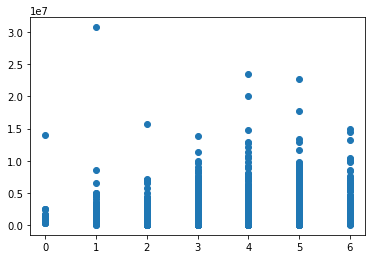

In [388]:
plt.scatter(dum_df1.bedrooms, dum_df1.price)

In [252]:
# plt.scatter(df1.heat_source, df1.price)


## Discrete numeric predictors 

In [253]:
# fig, (ax1, ax2) = plt.subplots (ncols=2, figsize = (12, 5))
# df1.plot.scatter(x='bathrooms', y='price', ax=ax1)
# df1.plot.scatter(x='bedrooms', y='price', ax=ax2)

In [254]:
# fig, (ax1, ax2) = plt.subplots (ncols=2, figsize = (12, 5))
# df1.plot.scatter(x='yr_renovated', y='price', ax=ax1)
# df1.plot.scatter(x='floors', y='price', ax=ax2)

## Continuous numerice predictors

In [ ]:
# fig, (ax1, ax2) = plt.subplots (ncols=2, figsize = (12, 5))
# df1.plot.scatter(x='sqft_living', y='price', ax=ax1)
# df1.plot.scatter(x='sqft_lot', y='price', ax=ax2)

In [ ]:
# fig, (ax1, ax2) = plt.subplots (ncols=2, figsize = (12, 5))
# df1.plot.scatter(x='Population', y='price', ax=ax1)
# df1.plot.scatter(x='sqft_above', y='price', ax=ax2)

Population looks like a discrete measure here.  We will go with sqft living as the most correlated to begin our greedy algorithm approach.

Overall this model is off by about $398,942. 

The intercept is extremely negative, at minus 9 to the 4th power.  The coefficient for `sqft_living` is about $565.  

This means that for each additional square foot of living space, the cost of the home increases by about $565.  

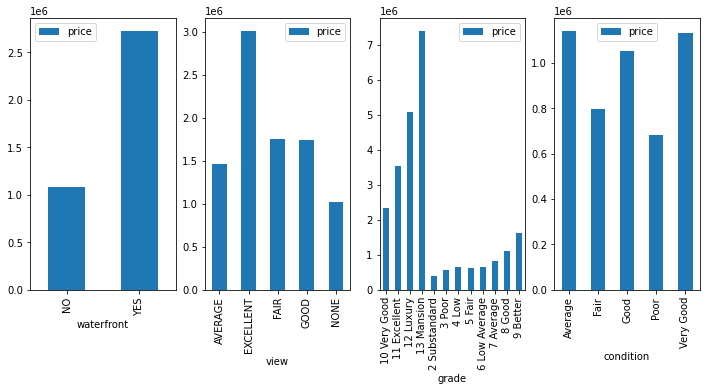

In [60]:
cats2 = ['waterfront', 'view', 'grade', 'condition']
fig, axes = plt.subplots(ncols=len(cats2), figsize=(12,5))
for index, feature in enumerate(cats2):
    df1.groupby(feature).mean().plot.bar(
        y='price', ax=axes[index])


## Bathrooms

In [389]:
# running our model with dummified predictors
X1=dum_df1.drop(labels=['selldate', 'price', 'Zipcode', 'address', 'lat', 'long', 
                       'sewer_system_PUBLIC RESTRICTED',
                      'heat_source_Oil', 'heat_source_Oil/Solar', 'heat_source_Other',
                      'floors', 'Neighborhood_Skykomish', 'Neighborhood_Black Diamond',
                      'Neighborhood_Baring' ], axis=1)
y=dum_df1.price

model_1 = sm.OLS(y, sm.add_constant(X1))
results1 = model_1.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     848.7
Date:                Wed, 21 Sep 2022   Prob (F-statistic):               0.00
Time:                        13:28:33   Log-Likelihood:            -4.2696e+05
No. Observations:               29152   AIC:                         8.540e+05
Df Residuals:                   29096   BIC:                         8.545e+05
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                            1.861e+06   1.28e+06      1.459      0.145   -6.39e+05    4.36e+06
bedrooms                        -8.682e+04   4750.228    -18.276      0.000   -9.61e+04   -7.75e+04
bathrooms                        6.515e+04   6644.083      9.805      0.000    5.21e+04    7.82e+04
sqft_living                       126.8821     15.119      8.392      0.000      97.248     156.516
sqft_lot                            0.5101      0.059      8.628      0.000       0.394       0.626
grade                            1.636e+05   5016.700     32.610      0.000    1.54e+05    1.73e+05
sqft_above                        279.2556     15.101     18.493      0.000     249.658     308.854
sqft_basement                     120.4456     11.590     10.392      0.000      97.729     143.163
sqft_garage                      -114.7079     16.250     -7.059      0.000    -146.559     -82.857
sqft_patio                         61.6889     15.229      4.051      0.000      31.840      91.538
yr_built                        -1618.0571    631.378     -2.563      0.010   -2855.587    -380.527
yr_renovated                       53.4548     20.004      2.672      0.008      14.246      92.664
yr_old                           1221.6426    636.347      1.920      0.055     -25.627    2468.912
Population                          0.9428      0.386      2.444      0.015       0.187       1.699
waterfront_YES                   7.918e+05   3.01e+04     26.314      0.000    7.33e+05    8.51e+05
greenbelt_YES                   -3.186e+04    2.1e+04     -1.517      0.129    -7.3e+04    9311.330
nuisance_YES                    -1.863e+04   8881.176     -2.098      0.036    -3.6e+04   -1221.424
view_EXCELLENT                   7.205e+05   3.04e+04     23.678      0.000    6.61e+05     7.8e+05
view_FAIR                        1.171e+05   4.02e+04      2.915      0.004    3.84e+04    1.96e+05
view_GOOD                        5.663e+04    2.3e+04      2.467      0.014    1.16e+04    1.02e+05
view_NONE                       -6.712e+04   1.39e+04     -4.842      0.000   -9.43e+04      -4e+04
condition_Fair                  -6.916e+04    3.8e+04     -1.822      0.068   -1.44e+05    5229.490
condition_Good                   3.147e+04   8325.064      3.780      0.000    1.52e+04    4.78e+04
condition_Poor                   6.374e+04   7.18e+04      0.887      0.375    -7.7e+04    2.05e+05
condition_Very Good              9.071e+04   1.17e+04      7.757      0.000    6.78e+04    1.14e+05
heat_source_Electricity/Solar   -1.046e+05    7.4e+04     -1.413      0.158    -2.5e+05    4.05e+04
heat_source_Gas                 -1.324e+04   7908.403     -1.674      0.094   -2.87e+04    2259.031
heat_source_Gas/Solar            1.457e+05   5.82e+04      2.506      0.012    3.17

In [391]:
baseline_mae = mean_absolute_error(y, results1.predict(sm.add_constant(X1)))
baseline_mae

289135.69900591567

## Condition

In [61]:
# df1['condition'].value_counts()

Average      17572
Good          8041
Very Good     3255
Fair           223
Poor            61
Name: condition, dtype: int64

In [ ]:
fig, (ax1, ax2) = plt.subplots (ncols=2, figsize = (12, 5))
df1.plot.scatter(x='condition', y='price', ax=ax1)
df1.plot.scatter(x='view', y='price', ax=ax2)

In [ ]:
fig, (ax) = plt.subplots (ncols=1, figsize = (15, 10))
df1.plot.scatter(x='grade', y='price', ax=ax)


In [ ]:
# df1.loc[df1['condition'] == 'Poor', 'condition'] = 'Fair'

## View

In [ ]:
# plt.scatter(df1.view, df1.price)

In [ ]:
# cat = "view"
# X_iter = df1[['sqft_living','bedrooms', cat]]
# # X_iter

In [ ]:
# X_iter = pd.get_dummies(X_iter, columns=[cat])
# X_iter

In [ ]:
# X_iter.drop('view_NONE', axis=1, inplace=True)
# X_iter

In [392]:
# running our model with dummified predictors
X1=dum_df1.drop(labels=['selldate', 'price', 'Zipcode', 'address', 'lat', 'long', 
                       'sewer_system_PUBLIC RESTRICTED', 'yr_built', 'sqft_above', 'bathrooms',
                      'heat_source_Oil', 'heat_source_Oil/Solar', 'heat_source_Other',
                      'floors', 'Neighborhood_Skykomish', 'Neighborhood_Black Diamond',
                      'Neighborhood_Baring' ], axis=1)
y=dum_df1.price

model_1 = sm.OLS(y, sm.add_constant(X1))
results1 = model_1.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     876.1
Date:                Wed, 21 Sep 2022   Prob (F-statistic):               0.00
Time:                        13:35:01   Log-Likelihood:            -4.2717e+05
No. Observations:               29152   AIC:                         8.545e+05
Df Residuals:                   29099   BIC:                         8.549e+05
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                           -1.424e+06   4.27e+04    -33.333      0.000   -1.51e+06   -1.34e+06
bedrooms                        -7.724e+04   4659.560    -16.577      0.000   -8.64e+04   -6.81e+04
sqft_living                       400.1305      6.719     59.552      0.000     386.961     413.300
sqft_lot                            0.5321      0.060      8.937      0.000       0.415       0.649
grade                            1.787e+05   4999.180     35.739      0.000    1.69e+05    1.88e+05
sqft_basement                     -43.5757      6.886     -6.328      0.000     -57.072     -30.079
sqft_garage                       -46.9054     15.897     -2.951      0.003     -78.064     -15.747
sqft_patio                         62.0866     15.328      4.051      0.000      32.043      92.130
yr_renovated                      102.5019      8.263     12.405      0.000      86.306     118.698
yr_old                           2771.0869    154.585     17.926      0.000    2468.093    3074.081
Population                          0.8461      0.389      2.177      0.029       0.084       1.608
waterfront_YES                    7.99e+05   3.03e+04     26.379      0.000     7.4e+05    8.58e+05
greenbelt_YES                   -3.624e+04   2.12e+04     -1.713      0.087   -7.77e+04    5233.339
nuisance_YES                    -1.587e+04   8943.760     -1.774      0.076   -3.34e+04    1662.645
view_EXCELLENT                   7.041e+05   3.06e+04     22.978      0.000    6.44e+05    7.64e+05
view_FAIR                          1.2e+05   4.05e+04      2.965      0.003    4.07e+04    1.99e+05
view_GOOD                        4.274e+04   2.31e+04      1.849      0.065   -2577.541     8.8e+04
view_NONE                       -6.585e+04    1.4e+04     -4.715      0.000   -9.32e+04   -3.85e+04
condition_Fair                  -4.895e+04   3.82e+04     -1.281      0.200   -1.24e+05     2.6e+04
condition_Good                   1.621e+04   8296.489      1.954      0.051     -53.272    3.25e+04
condition_Poor                    8.59e+04   7.24e+04      1.187      0.235   -5.59e+04    2.28e+05
condition_Very Good              6.962e+04   1.15e+04      6.040      0.000     4.7e+04    9.22e+04
heat_source_Electricity/Solar   -1.016e+05   7.45e+04     -1.363      0.173   -2.48e+05    4.45e+04
heat_source_Gas                 -9576.6689   7948.721     -1.205      0.228   -2.52e+04    6003.187
heat_source_Gas/Solar             1.46e+05   5.86e+04      2.493      0.013    3.12e+04    2.61e+05
sewer_system_PRIVATE RESTRICTED -3.564e+05   2.51e+05     -1.418      0.156   -8.49e+05    1.36e+05
sewer_system_PUBLIC              1.026e+05   1.15e+04      8.901      0.000       8e+04    1.25e+05
Neighborhood_Bellevue            1.034e+06   1.99e+04     51.957      0.000    9.95

In [394]:
baseline_mae = mean_absolute_error(y, results1.predict(sm.add_constant(X1)))
baseline_mae

291219.4578325297

In [ ]:
# plt.scatter(df1.grade, df1.price)

In [ ]:
# plt.scatter(df1.sewer_system, df1.price)

In [ ]:
# plt.scatter(df1.greenbelt, df1.price)

# Neighborhood

In [ ]:
Neigh = ['Neighborhood']
fig, ax = plt.subplots(ncols=len(Neigh), figsize=(12,5))
for index, feature in enumerate(Neigh):
    df1.groupby(feature).mean().plot.bar(
        y='price', ax=ax)


In [ ]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_partregress_grid(
    iter_results, 
    exog_idx=list(X_iter.columns),
    grid=(2,3),
    fig=fig)
plt.tight_layout()
plt.show()

In [ ]:
X_iter

In [ ]:
iter_model = sm.OLS(y, sm.add_constant(X_iter))
iter_results = iter_model.fit()
print(iter_results.summary())

In [ ]:
iter_mae = mean_absolute_error(y, iter_results.predict(sm.add_constant(X_iter)))
iter_mae

Our iterated model explains about 53 percent of the variance in `price` using `sqft_living` and `Neighborhood`. There  Overall this model is statistically significant, explaining about 38 percent of the variance in price.

In [ ]:
fig = plt.figure(figsize=(30,220))
sm.graphics.plot_partregress_grid(
    iter_results, 
    exog_idx=list(X_iter.columns),
    grid=(14,15),
    fig=fig)
plt.tight_layout()
plt.show()

ccpr function partial 

In [ ]:
# df1['Neighborhood'].value_counts()

In [ ]:
# sns.heatmap(X.corr())

In [ ]:
# df1.heat_source

In [ ]:
X.corr()

<AxesSubplot:>

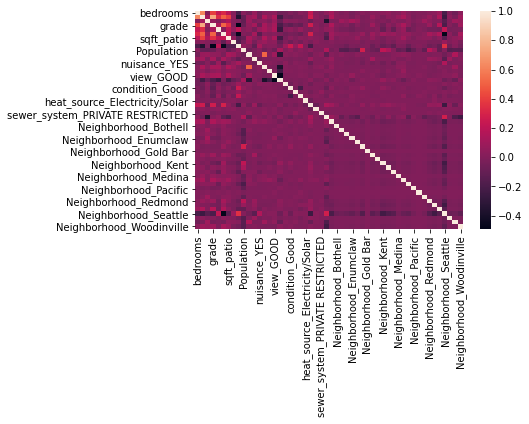

In [395]:
sns.heatmap(X1.corr())

In [396]:
abs(X1.corr()) > .75

,bedrooms,sqft_living,sqft_lot,grade,sqft_basement,sqft_garage,sqft_patio,yr_renovated,yr_old,Population,...,Neighborhood_Pacific,Neighborhood_Preston,Neighborhood_Ravensdale,Neighborhood_Redmond,Neighborhood_Renton,Neighborhood_Sammamish,Neighborhood_Seattle,Neighborhood_Snoqualmie,Neighborhood_Vashon,Neighborhood_Woodinville
bedrooms,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_living,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_lot,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
grade,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_basement,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_garage,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_patio,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
yr_renovated,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
yr_old,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
Population,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [397]:
X2 = X1.corr().abs().stack().reset_index().sort_values(0, ascending=False)
X2['pairs'] = list(zip(X2.level_0, X2.level_1))
X2.set_index(['pairs'], inplace=True)
X2.drop(columns=['level_1', 'level_0'], inplace = True)
X2.columns = ['cc']
X2.drop_duplicates(inplace=True)
X2[(X2.cc>.75) & (X2.cc<1)]

,cc
pairs,


In [ ]:
X.drop(columns=['yr_built', 'sqft_above', 'bathrooms'], inplace=True)

There are three sets of variables that are highly correlated: yr_old and yr_built, sqft_above
and sqft_living, and bathrooms with sqft_living

In [ ]:
# running our model with dummified predictors
y=dum_df1.price

model_1 = sm.OLS(y, sm.add_constant(X))
results1 = model_1.fit()
results1.summary()

### Final Model

## Regression Results

## Level Up: Project Enhancements

After completing the minimum project requirements, you could consider the following enhancements if you have time:

* Consider applying a linear or non-linear transformation to your features and/or target
* Investigate the linear regression assumptions for your final model
* Identify and remove outliers, then redo the analysis
* Compile the data cleaning code into a function

## Conclusion